In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
life = pd.read_csv("LifeExpectancy.csv")

In [3]:
life.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2928 entries, 0 to 2927
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2928 non-null   object 
 1   Year                             2928 non-null   int64  
 2   Status                           2928 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   int64  
 5   infant deaths                    2928 non-null   int64  
 6   Alcohol                          2735 non-null   float64
 7   percentage expenditure           2928 non-null   float64
 8   Hepatitis B                      2375 non-null   float64
 9   Measles                          2928 non-null   int64  
 10  BMI                              2896 non-null   float64
 11  under-five deaths                2928 non-null   int64  
 12  Polio               

In [4]:
life.head()

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5


In [5]:
life.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                443
Population                         644
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

In [6]:
def fill_na_with_mean(df, columns):
    for column in columns:
        df[column] = df.groupby('Country')[column].transform(lambda x: x.fillna(x.mean()))
    return df

In [7]:
columns_na = ['Alcohol', 'Hepatitis B', 'BMI ', 'Polio', 'Total expenditure',
       'Diphtheria ', 'GDP', 'Population', 'thinness  1-19 years',
       'thinness 5-9 years', 'Income composition of resources', 'Schooling']


In [8]:
life = fill_na_with_mean(life, columns_na)

In [9]:
life.isna().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                             16
percentage expenditure               0
Hepatitis B                        144
Measles                              0
BMI                                 32
under-five deaths                    0
Polio                                0
Total expenditure                   32
Diphtheria                           0
HIV/AIDS                             0
GDP                                400
Population                         640
thinness  1-19 years                32
thinness 5-9 years                  32
Income composition of resources    160
Schooling                          160
dtype: int64

In [10]:
life[columns_na] = life[columns_na].fillna(life[columns_na].mean())

In [11]:
life.isna().sum()

Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
BMI                                0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
HIV/AIDS                           0
GDP                                0
Population                         0
thinness  1-19 years               0
thinness 5-9 years                 0
Income composition of resources    0
Schooling                          0
dtype: int64

In [12]:
life.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2928.00000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2928.000000,2.928000e+03,2928.000000,2928.000000,2928.000000,2928.000000
mean,2007.50000,69.224932,164.796448,30.407445,4.612109,740.321185,78.657263,2427.855874,38.235394,42.179303,82.393862,5.913418,82.180816,1.747712,7389.061605,1.274585e+07,4.850622,4.881423,0.627419,11.999639
std,4.61056,9.523867,124.292079,118.114450,4.026333,1990.930605,24.515316,11485.970937,19.850184,160.700547,23.464941,2.441433,23.733088,5.085542,13179.150053,5.390773e+07,4.396597,4.484890,0.205131,3.253691
min,2000.00000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.370000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2003.75000,63.100000,74.000000,0.000000,0.950000,4.853964,73.500000,0.000000,19.400000,0.000000,77.750000,4.280000,78.000000,0.100000,560.979104,4.181205e+05,1.600000,1.600000,0.504000,10.300000
50%,2007.50000,72.100000,144.000000,3.000000,3.790000,65.611455,88.000000,17.000000,43.000000,4.000000,93.000000,5.785000,93.000000,0.100000,2832.342707,3.589254e+06,3.400000,3.400000,0.662000,12.100000
75%,2011.25000,75.700000,228.000000,22.000000,7.680000,442.614322,96.000000,362.250000,56.100000,28.000000,97.000000,7.430000,97.000000,0.800000,7389.061605,1.274585e+07,7.100000,7.200000,0.773000,14.100000
max,2015.00000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,77.600000,2500.000000,99.000000,17.600000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


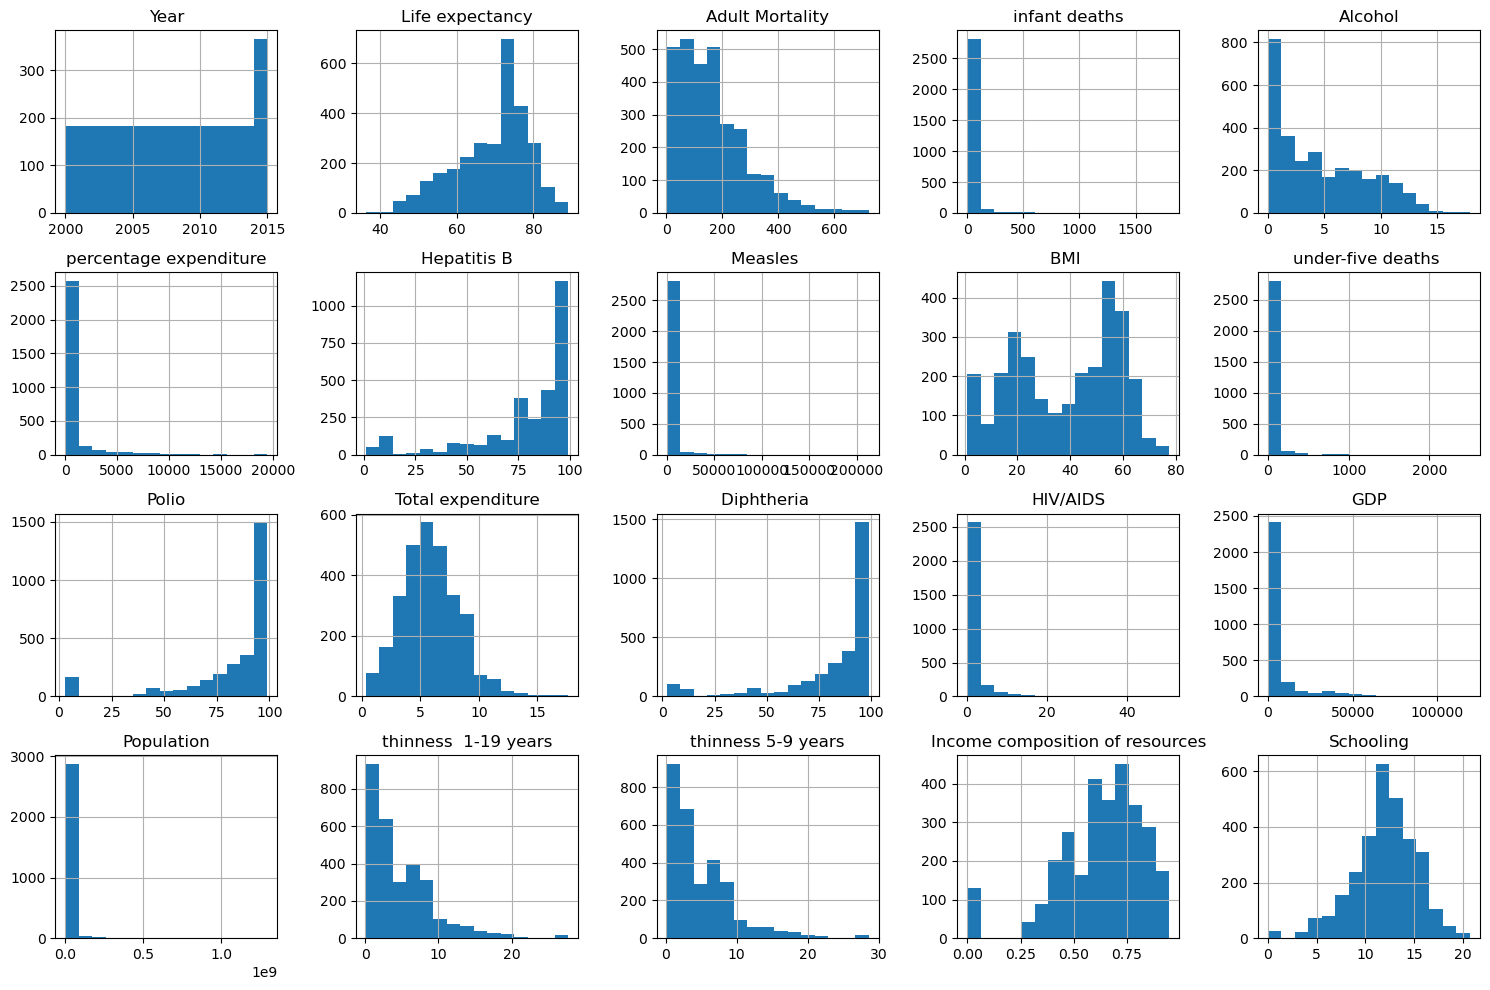

In [13]:
numeric_columns = life.select_dtypes(include = [np.number]).columns
life[numeric_columns].hist(bins = 15, figsize = (15, 10), layout = (4,5))
plt.tight_layout()
plt.show()

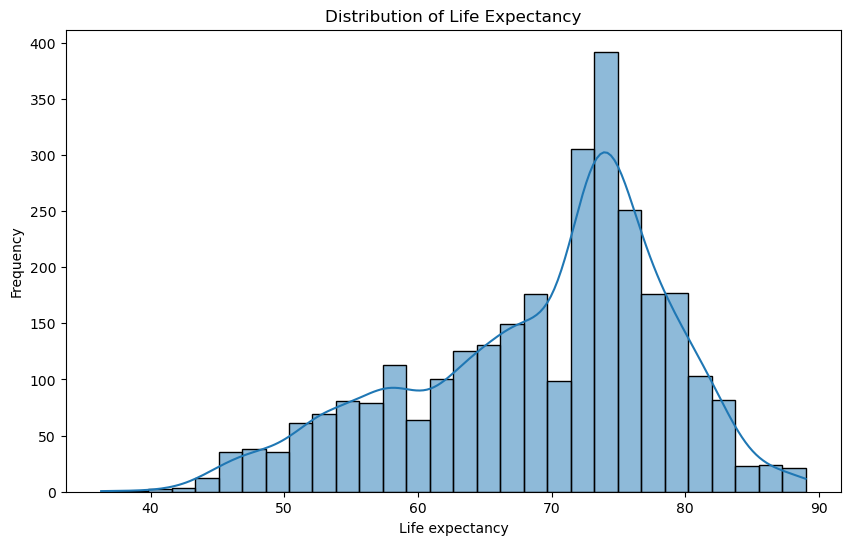

In [14]:
plt.figure(figsize=(10, 6))
sns.histplot(life['Life expectancy'], kde=True)
plt.title('Distribution of Life Expectancy')
plt.xlabel('Life expectancy')
plt.ylabel('Frequency')
plt.show()

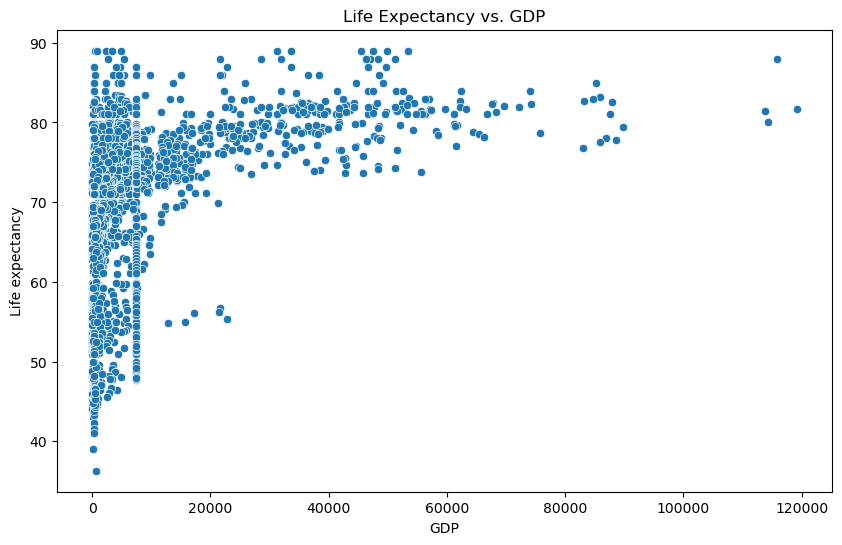

In [15]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=life, x='GDP', y='Life expectancy')
plt.title('Life Expectancy vs. GDP')
plt.xlabel('GDP')
plt.ylabel('Life expectancy')
plt.show()

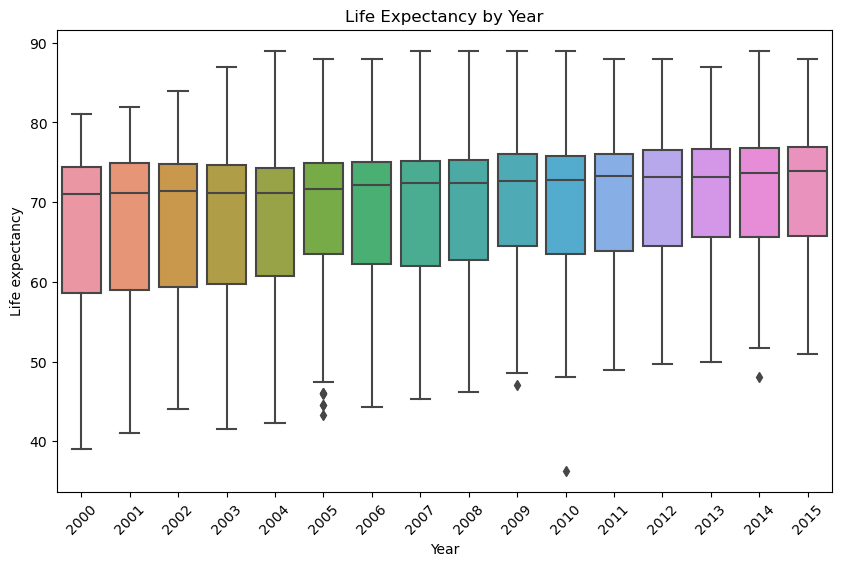

In [16]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=life, x='Year', y='Life expectancy')
plt.title('Life Expectancy by Year')
plt.xlabel('Year')
plt.ylabel('Life expectancy')
plt.xticks(rotation=45)
plt.show()

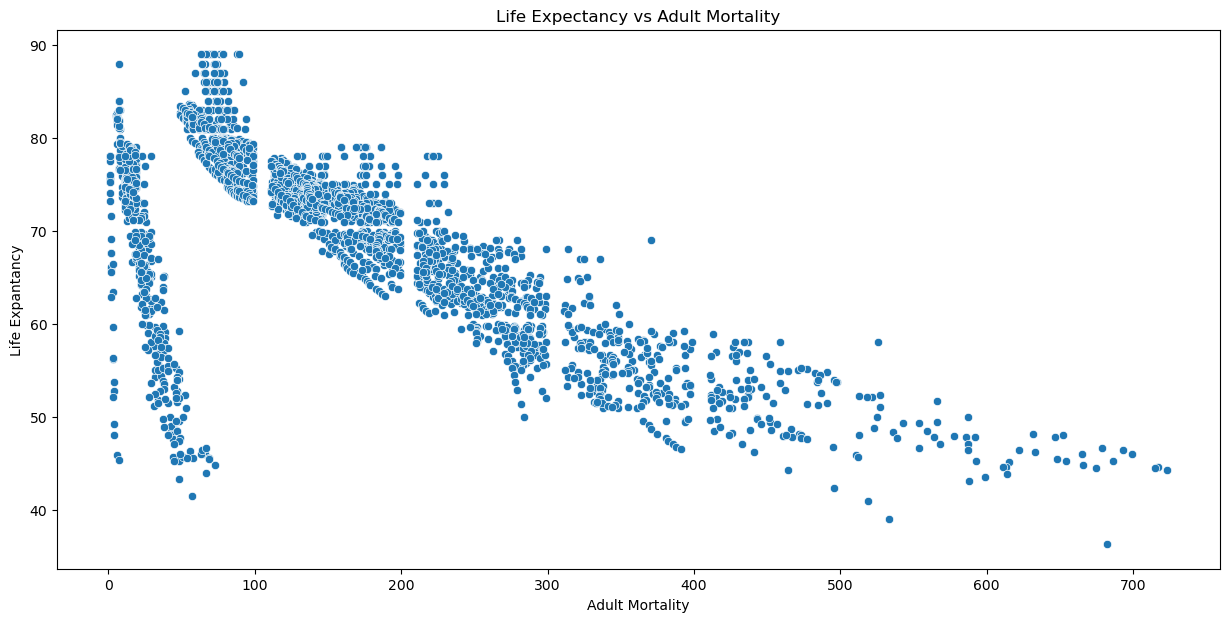

In [17]:
plt.figure(figsize = (15,7))
sns.scatterplot(data = life, x = 'Adult Mortality', y= 'Life expectancy')
plt.title('Life Expectancy vs Adult Mortality')
plt.xlabel('Adult Mortality')
plt.ylabel('Life Expantancy')
plt.show()

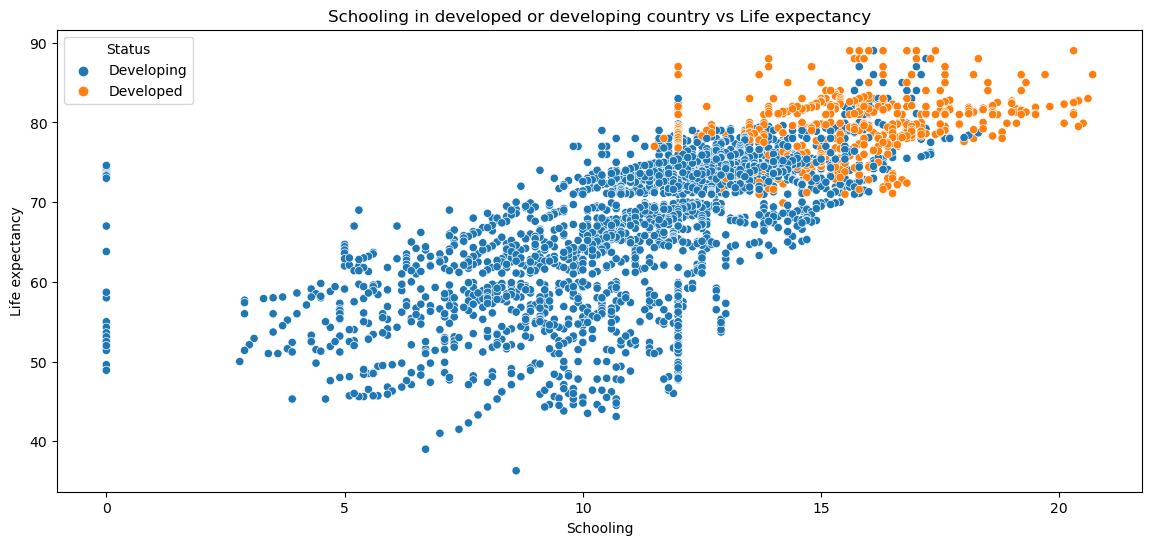

In [18]:
plt.figure(figsize = (14,6))
sns.scatterplot(data = life, x = 'Schooling', y ='Life expectancy', hue = 'Status')
plt.title('Schooling in developed or developing country vs Life expectancy')
plt.xlabel('Schooling')
plt.ylabel('Life expectancy')
plt.show()

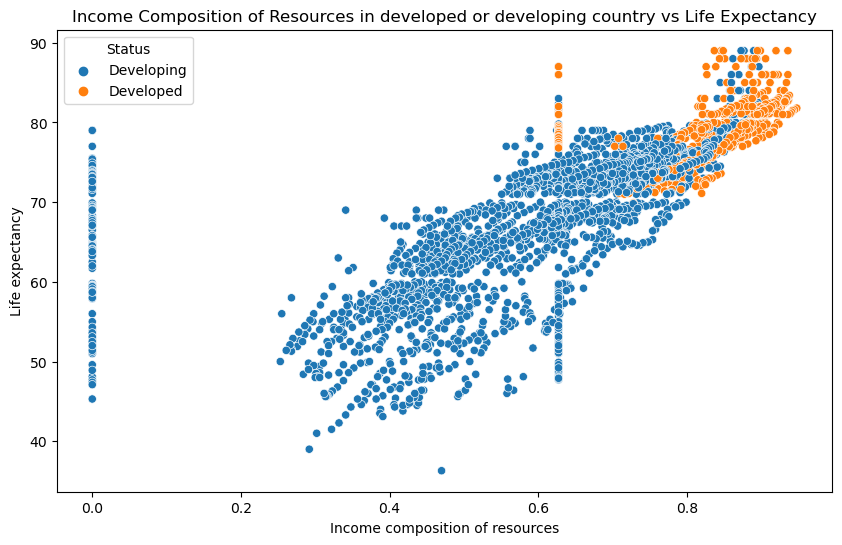

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=life, x='Income composition of resources', y='Life expectancy', hue = 'Status')
plt.title('Income Composition of Resources in developed or developing country vs Life Expectancy')
plt.show()

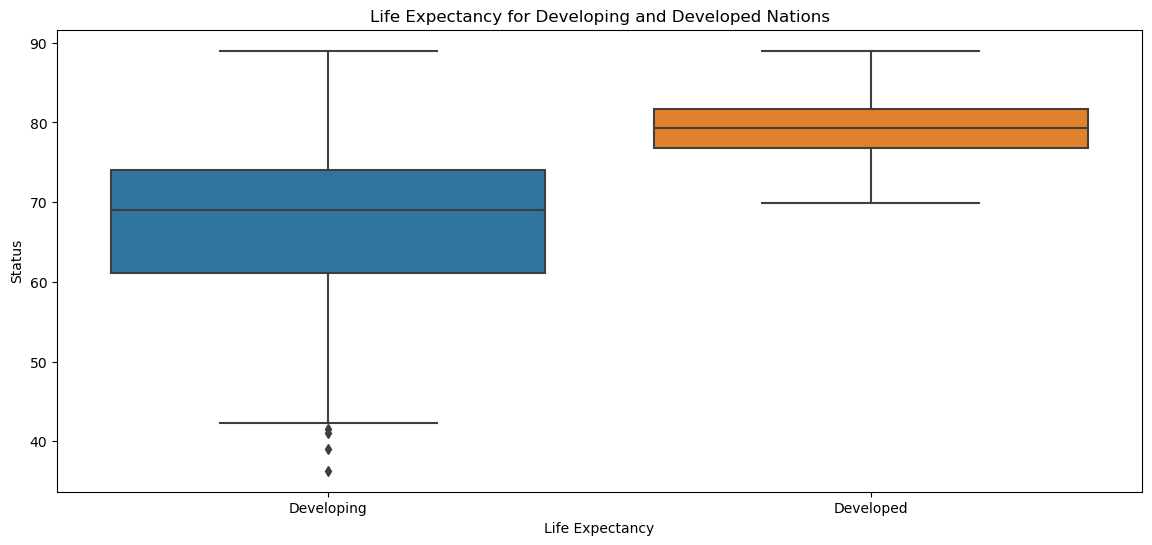

In [20]:
plt.figure(figsize = (14,6))
sns.boxplot(data = life, x = 'Status', y= 'Life expectancy')
plt.title('Life Expectancy for Developing and Developed Nations')
plt.xlabel('Life Expectancy')
plt.ylabel('Status')
plt.show()

In [21]:
mean_le = life.groupby(['Country', 'Year'])['Life expectancy'].mean().reset_index()

In [22]:
country_mean_le = mean_le.groupby('Country')['Life expectancy'].mean().reset_index()

In [23]:
top_10_countries = country_mean_le.nlargest(10, 'Life expectancy')['Country']

In [24]:
top_10_df = life[life['Country'].isin(top_10_countries)]

In [25]:
bottom_10_countries = country_mean_le.nsmallest(10, 'Life expectancy')['Country']

In [26]:
bottom_10_df = life[life['Country'].isin(bottom_10_countries)]

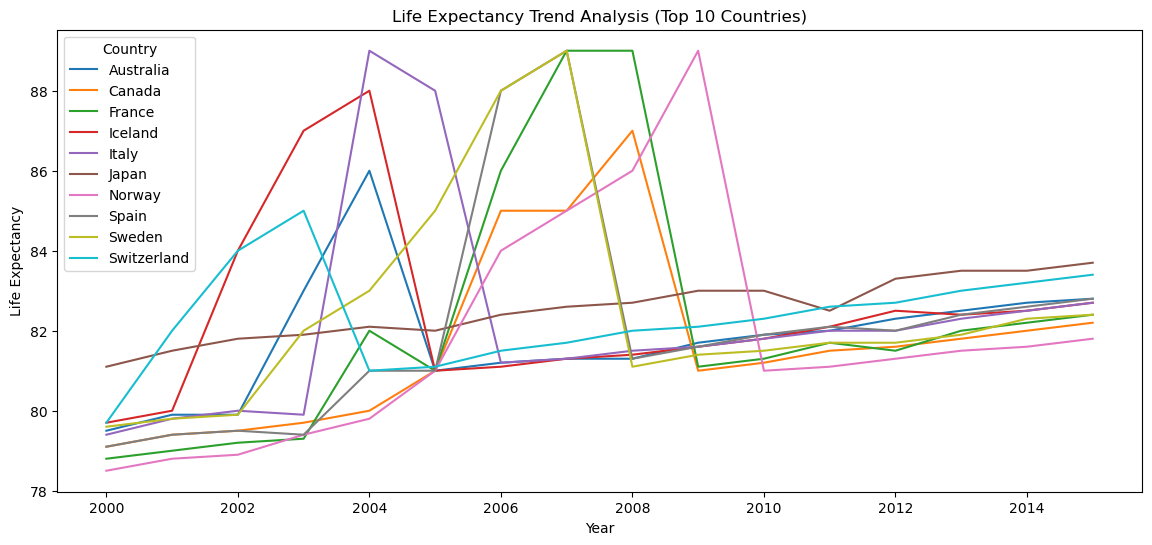

In [27]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=top_10_df, x='Year', y='Life expectancy', hue = 'Country')
plt.title('Life Expectancy Trend Analysis (Top 10 Countries)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Country')
plt.show()

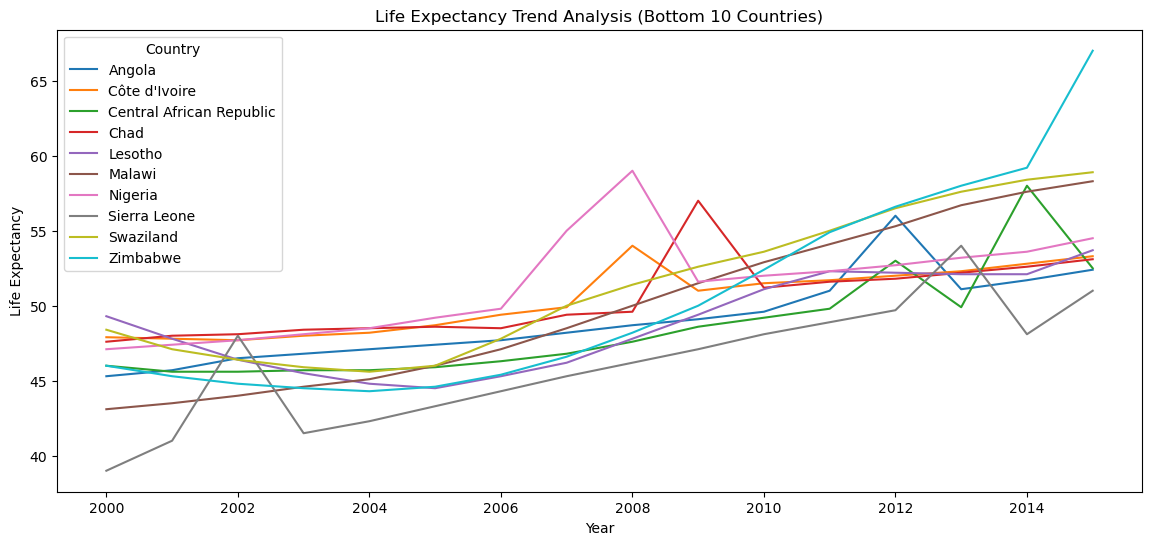

In [28]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=bottom_10_df, x='Year', y='Life expectancy', hue = 'Country')
plt.title('Life Expectancy Trend Analysis (Bottom 10 Countries)')
plt.xlabel('Year')
plt.ylabel('Life Expectancy')
plt.legend(title='Country')
plt.show()

In [29]:
mean_health_expenditure = life.groupby(['Country', 'Year'])['Total expenditure'].mean().reset_index()

In [30]:
overall_mean_health_expenditure = mean_health_expenditure.groupby('Country')['Total expenditure'].mean().reset_index()

In [31]:
top_10_countries_health_expenditure = overall_mean_health_expenditure.nlargest(10, 'Total expenditure')['Country']

In [32]:
bottom_10_countries_health_expenditure = overall_mean_health_expenditure.nsmallest(10, 'Total expenditure')['Country']

In [33]:
top_10_data_health_expenditure = mean_health_expenditure[mean_health_expenditure['Country'].isin(top_10_countries_health_expenditure)]

In [34]:
bottom_10_data_health_expenditure = mean_health_expenditure[mean_health_expenditure['Country'].isin(bottom_10_countries_health_expenditure)]

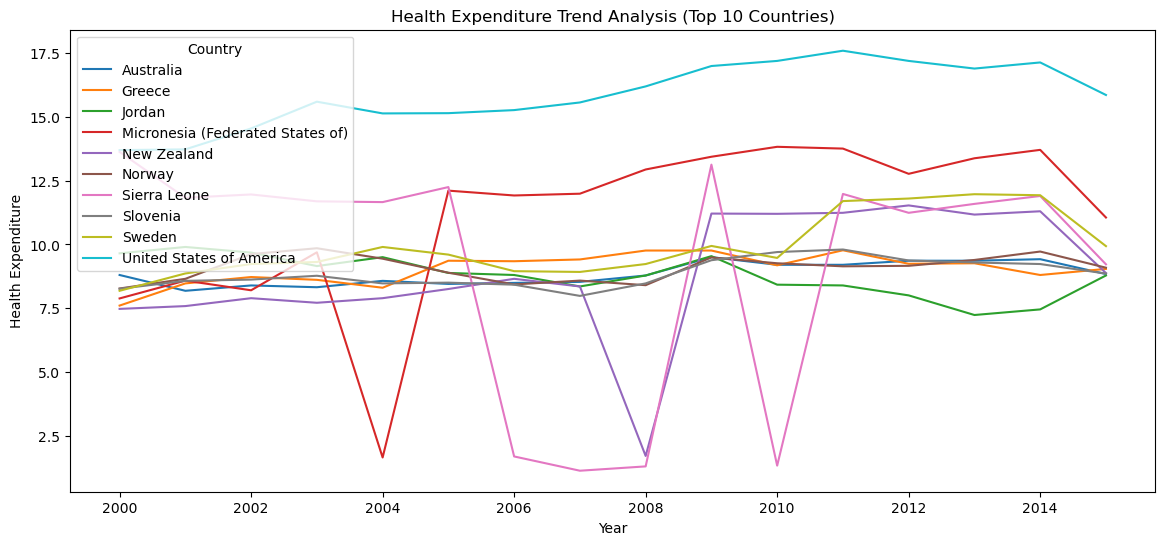

In [35]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=top_10_data_health_expenditure, x='Year', y='Total expenditure', hue='Country')
plt.title('Health Expenditure Trend Analysis (Top 10 Countries)')
plt.xlabel('Year')
plt.ylabel('Health Expenditure')
plt.legend(title='Country')
plt.show()

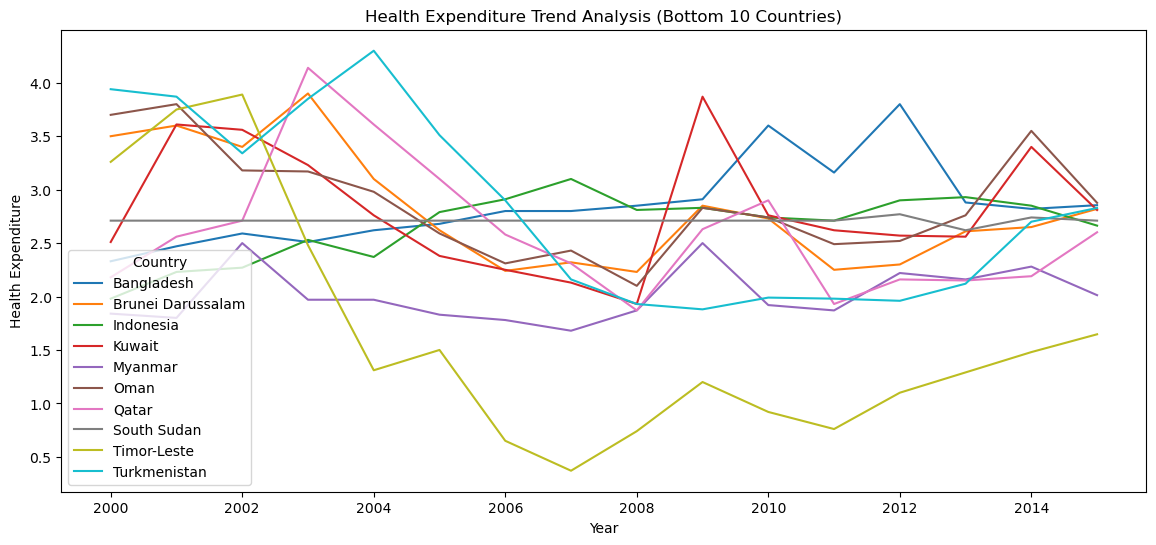

In [36]:
plt.figure(figsize=(14, 6))
sns.lineplot(data=bottom_10_data_health_expenditure, x='Year', y='Total expenditure', hue='Country')
plt.title('Health Expenditure Trend Analysis (Bottom 10 Countries)')
plt.xlabel('Year')
plt.ylabel('Health Expenditure')
plt.legend(title='Country')
plt.show()

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [38]:
X = life.drop(['Life expectancy', 'Country', 'Year', 'Status'], axis=1)
y = life['Life expectancy']

In [39]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [41]:
model = RandomForestRegressor(n_estimators=200, max_depth=15, min_samples_split=5, min_samples_leaf=2, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(max_depth=15, min_samples_leaf=2, min_samples_split=5,
                      n_estimators=200, random_state=42)

In [42]:
y_pred = model.predict(X_test)
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")
print(f"R2 Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 2.9203825848046487
R2 Score: 0.9662381183408613


In [43]:
importances = model.feature_importances_
features = X.columns
feature_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)
feature_importance_df

,Feature,Importance
11,HIV/AIDS,0.600670
16,Income composition of resources,0.156893
0,Adult Mortality,0.135744
17,Schooling,0.021099
6,BMI,0.016514
7,under-five deaths,0.014934
15,thinness 5-9 years,0.008341
2,Alcohol,0.008186
14,thinness 1-19 years,0.005755
9,Total expenditure,0.005565


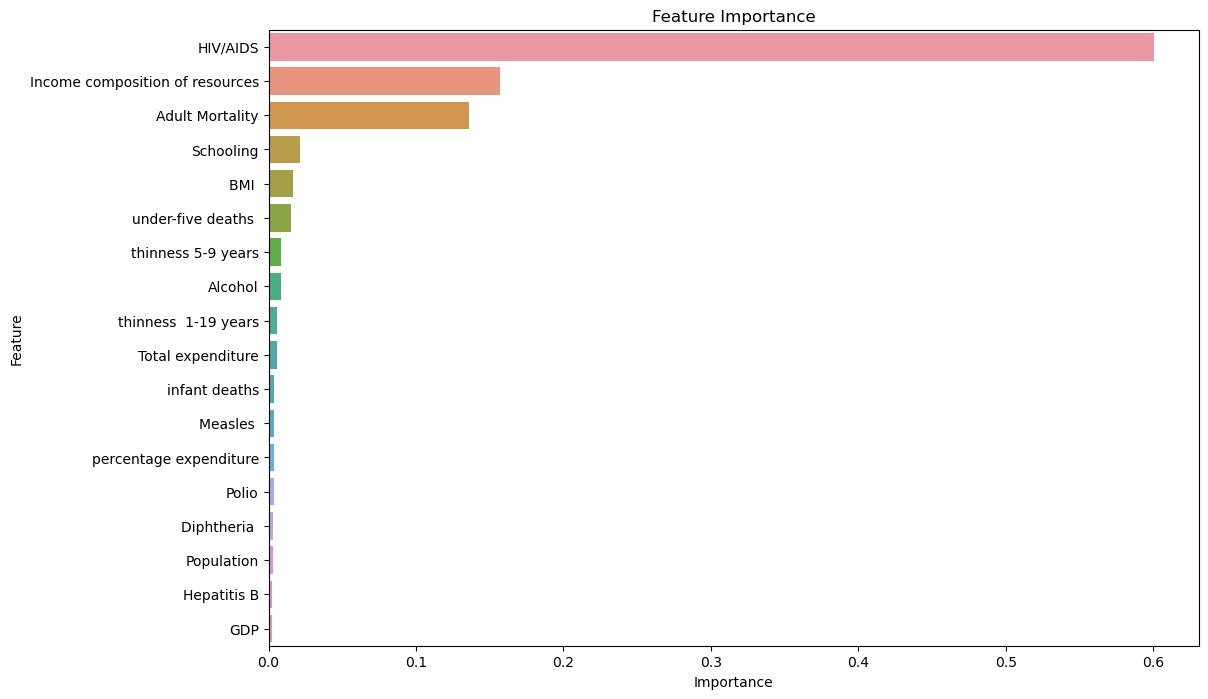

In [44]:
plt.figure(figsize=(12, 8))
sns.barplot(data=feature_importance_df, x='Importance', y='Feature')
plt.title('Feature Importance')
plt.show()

The conclusions that can be drawn from the above RandomForestRegressor model are as follows:
1. The prevalence of HIV/AIDS is the most critical factor influencing life expectancy. This high importance suggests that regions heavily impacted by HIV/AIDS have significantly lower life expectancies, emphasizing the importance of healthcare and intervention programs aimed at managing and preventing this disease.
2. Economic factors play a substantial role in determining life expectancy. Higher income levels and better access to resources are associated with improved life expectancy. This underscores the importance of economic development and equitable distribution of resources.
3. The rate of adult mortality is a crucial determinant of life expectancy. High adult mortality rates reduce the average life expectancy, indicating the need for better healthcare, safety, and preventive measures to reduce adult deaths.